# PD7 - Adam Frej

## Import paczek i danych:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import mixture
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
val_df = pd.read_csv("val.csv")

In [3]:
train_df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488
1,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675
2,12.58,1.29,2.10,20.0,103,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640
3,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510
4,13.84,4.12,2.38,19.5,89,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480


In [4]:
test_df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750
1,0,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278
2,0,11.84,0.89,2.58,18.0,94,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520
3,0,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
4,0,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625


In [5]:
val_df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
1,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
2,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685
3,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660
4,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845


## Trenowanie GMM:
Algorytm GMM wykorzystuje rozkłady normalne do znjadowania klastrów. Dla każdego punktu zwraca prawdopodobieństwo należenia do danego klastra. Aby znaleźć próbki odstające utworzymy jeden klaster, który reprezentuje pojedynczy rozkład normalny. Jeżeli dany punkt ma odstające prawdopodobieństwo, to można go zaklasyfikować jako odstający od rozkładu normalnego.

In [6]:
gmm = mixture.GaussianMixture(n_components=1)
gmm.fit(train_df)

GaussianMixture()

## Rozkład prawdopodbieństwa:

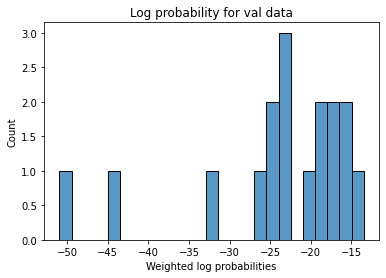

In [7]:
log_prob_val = gmm.score_samples(val_df)
sns.histplot(log_prob_val, binwidth=1.5)
plt.title("Log probability for val data")
plt.xlabel("Weighted log probabilities")
plt.show()

Wybierzmy granicę, która odziela próbki odstające. Jest to wybór subiektywny. Z wykresu -30 wydaje się być odpowiednie.

In [8]:
min_prob = -30

## PCA:
Zwizualizujmy przy pomocy PCA nasze dane. Na wykresie oznaczone są próbki odstające. Jak widać dla zbioru walidacyjnego znaleźliśmy 3.

<AxesSubplot:>

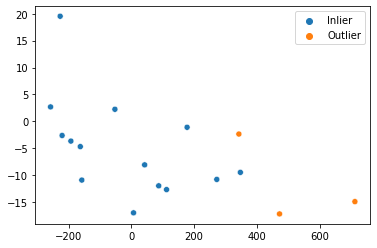

In [9]:
pca = PCA(n_components=2)
pca.fit(train_df)
pca_val = pca.transform(val_df)
sns.scatterplot(x=pca_val[:, 0], y=pca_val[:, 1], hue=map(lambda x: "Inlier" if x == False else "Outlier", log_prob_val<min_prob))

## Test:
Użyjmy wytrenowanych modeli na zbiorze testowym. Granica jest już wyznaczona. Wizualizuję prawdopobieństwa tylko dodatkowo.

In [10]:
test_X = test_df.iloc[:, 1:]
test_Y = test_df.iloc[:, 0]

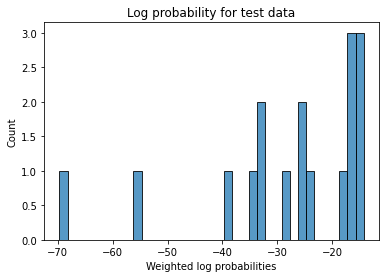

In [11]:
log_prob_test = gmm.score_samples(test_X)
sns.histplot(log_prob_test, binwidth=1.5)
plt.title("Log probability for test data")
plt.xlabel("Weighted log probabilities")
plt.show()

Algorytm znalazł 6 próbek odstających.

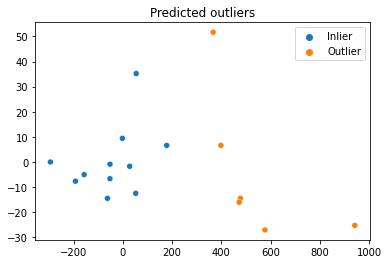

In [12]:
pca_test = pca.transform(test_X)
sns.scatterplot(x=pca_test[:, 0], y=pca_test[:, 1], hue=map(lambda x: "Inlier" if x == False else "Outlier", log_prob_test<min_prob))
plt.title("Predicted outliers")
plt.show()

Poniżej zaprezentowane są prawdziwe etykiety próbek odstających. Jak widać znaleźliśmy tylko o jedną za dużo, co jest dobrym wynikiem.

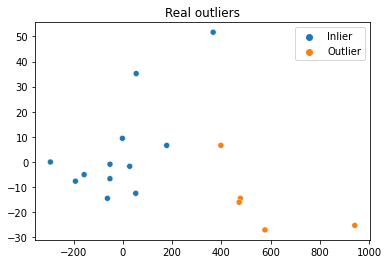

In [13]:
sns.scatterplot(x=pca_test[:, 0], y=pca_test[:, 1], hue=map(lambda x: "Inlier" if x == False else "Outlier", test_Y==1))
plt.title("Real outliers")
plt.show()

## Metryki:

In [14]:
test_Y_pred = np.array(log_prob_test<min_prob, dtype = int)
print("F1-Score: ", f1_score(y_true=test_Y, y_pred=test_Y_pred))
print("Precision: ", precision_score(y_true=test_Y, y_pred=test_Y_pred))
print("Recall: ", recall_score(y_true=test_Y, y_pred=test_Y_pred))

F1-Score:  0.9090909090909091
Precision:  0.8333333333333334
Recall:  1.0


## Podsumowanie
Jak widać algorytm GMM świetnie się nadaje do znajdowania próbek odstających. Oczywiście, o ile takie próbki definiujemy w kontekście rozkładu normalnego.